In [1404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1405]:
#!pip install pystan

In [1406]:
#conda install --channel conda-forge pystan fbprophet

# Ltes create the bas line(navie model)

In [1407]:
df0=pd.read_excel("D:\\pyt\\Assignment\\Assignment 18-Forecasting\\Airlines+Data.xlsx", date_parser="Month" , index_col="Month")
df0.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [1408]:
df0["forecast"]=df0["Passengers"].shift(1)
df0.dropna(inplace=True)
df0.head()

,Passengers,forecast
Month,,
1995-02-01,118,112.0
1995-03-01,132,118.0
1995-04-01,129,132.0
1995-05-01,121,129.0
1995-06-01,135,121.0


In [1409]:
rsme0= np.sqrt(mean_squared_error(df0.Passengers, df0.forecast))
rsme0

23.33328320796621

# Here we will use two different libraries to do the forecasting, Lets start with fbprophet first

In [1410]:
import fbprophet

In [1411]:
df=pd.read_excel("D:\\pyt\\Assignment\\Assignment 18-Forecasting\\Airlines+Data.xlsx", date_parser="Month")
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [1412]:
# checking for missing values, dtypes of the columns, and shape of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [1413]:
# for fbprophet library we require column names as "ds" for date column, and "y for observation"
df.columns= ["ds", "y"]
df.head()

,ds,y
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


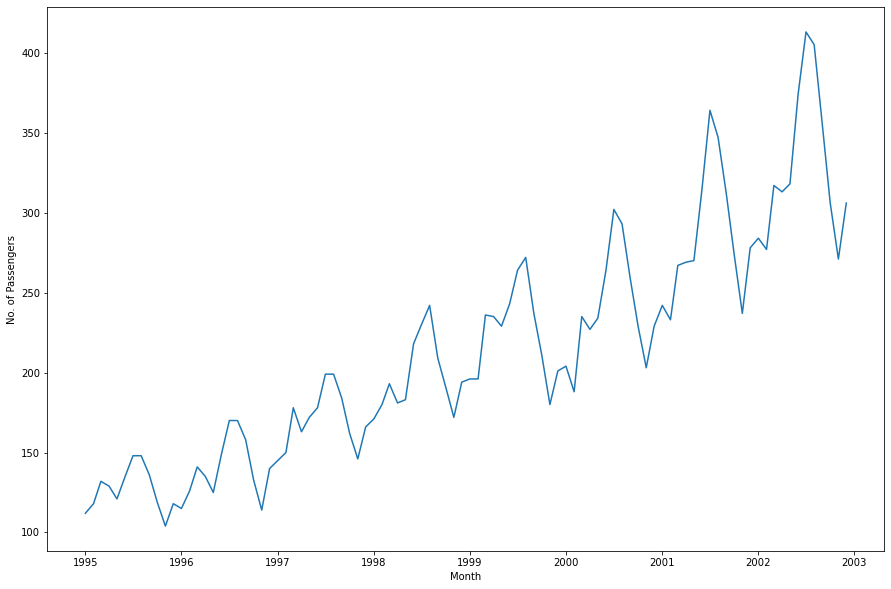

In [1414]:
# Plotting the data 
plt.figure(figsize=(15,10))
plt.plot(df.ds, df.y)
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.show()

In [1415]:
# Creating train test split with 6 years data as traing and 2 years data as test data
train = df.iloc[0:72, :]
train.head()

,ds,y
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [1416]:
train.tail()

,ds,y
67,2000-08-01,293
68,2000-09-01,259
69,2000-10-01,229
70,2000-11-01,203
71,2000-12-01,229


In [1417]:
# we can see the training shape of 6 years i.e. 6*12 = 72 months
train.shape

(72, 2)

In [1418]:
# Creating train test split with 6 years data as traing and 2 years data as test data
test= df.iloc[72:, :]

In [1419]:
test.head()

,ds,y
72,2001-01-01,242
73,2001-02-01,233
74,2001-03-01,267
75,2001-04-01,269
76,2001-05-01,270


In [1420]:
# we can see the training shape of 2 years i.e. 2*12 = 24 months
test.shape

(24, 2)

In [1421]:
# This library will automatically takes into account different aspects of the time series such as saesonality, trend etc.
# building the model using prophet
model = Prophet()

In [1422]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1423]:
model.component_modes
# here we can see that it automatically considered the yearly seasonality 

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [1424]:
pred = model.predict(test)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,252.510703,234.380594,255.562732,252.506584,252.517514,-7.178014,-7.178014,-7.178014,-7.178014,-7.178014,-7.178014,0.0,0.0,0.0,245.332689
1,2001-02-01,254.454438,244.484916,266.965220,254.421212,254.496293,1.589998,1.589998,1.589998,1.589998,1.589998,1.589998,0.0,0.0,0.0,256.044436
2,2001-03-01,256.210069,256.795491,277.883695,256.140238,256.296692,11.330831,11.330831,11.330831,11.330831,11.330831,11.330831,0.0,0.0,0.0,267.540900
3,2001-04-01,258.153804,249.551103,270.881449,258.031325,258.292793,1.598574,1.598574,1.598574,1.598574,1.598574,1.598574,0.0,0.0,0.0,259.752377
4,2001-05-01,260.034838,248.566598,270.236838,259.842520,260.235989,0.096023,0.096023,0.096023,0.096023,0.096023,0.096023,0.0,0.0,0.0,260.130861


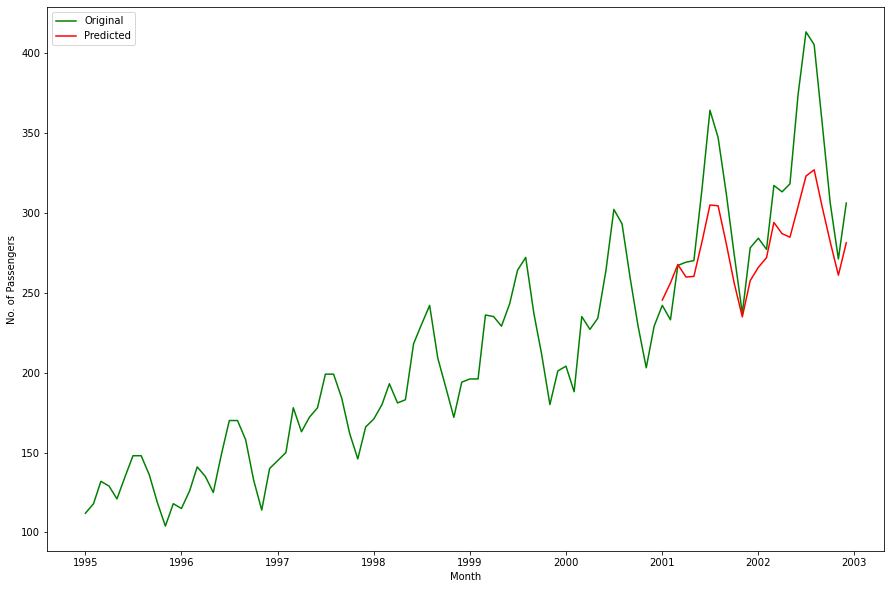

In [1425]:
# plotting the original data and predicted data for visulaization 
plt.figure(figsize=(15,10))
plt.plot(df.ds, df.y, color='green', label='Original')
plt.plot(pred.ds, pred.yhat, color='Red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

In [1426]:
from sklearn.metrics import mean_squared_error

In [1427]:
# Calculating the Rsme value for the model 
rsme = np.round(np.sqrt(mean_squared_error(test.y, prdiction.yhat)), 2)
rsme

38.04

In [1428]:
# creating the future data frame of 12 months 
future_dates = model1.make_future_dataframe(periods=24, freq="M")
future_dates.head()

,ds
0,1995-01-01
1,1995-02-01
2,1995-03-01
3,1995-04-01
4,1995-05-01


# lets use total data as training and try to predict for future 12 months 

In [1429]:
model1 =Prophet()

In [1430]:
model1.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1431]:
predicted= model1.predict(df)

In [1432]:
predicted.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
91,2002-08-01,328.499598,356.116568,387.715354,328.499598,328.499598,43.997944,43.997944,43.997944,43.997944,43.997944,43.997944,0.0,0.0,0.0,372.497541
92,2002-09-01,331.952764,329.004190,360.548117,331.952764,331.952764,12.833249,12.833249,12.833249,12.833249,12.833249,12.833249,0.0,0.0,0.0,344.786013
93,2002-10-01,335.294538,302.163107,335.290133,335.294538,335.294538,-16.571678,-16.571678,-16.571678,-16.571678,-16.571678,-16.571678,0.0,0.0,0.0,318.722859
94,2002-11-01,338.747704,279.455092,310.830561,338.747704,338.747704,-43.701334,-43.701334,-43.701334,-43.701334,-43.701334,-43.701334,0.0,0.0,0.0,295.046370
95,2002-12-01,342.089478,304.655280,336.959089,342.089478,342.089478,-21.945215,-21.945215,-21.945215,-21.945215,-21.945215,-21.945215,0.0,0.0,0.0,320.144263


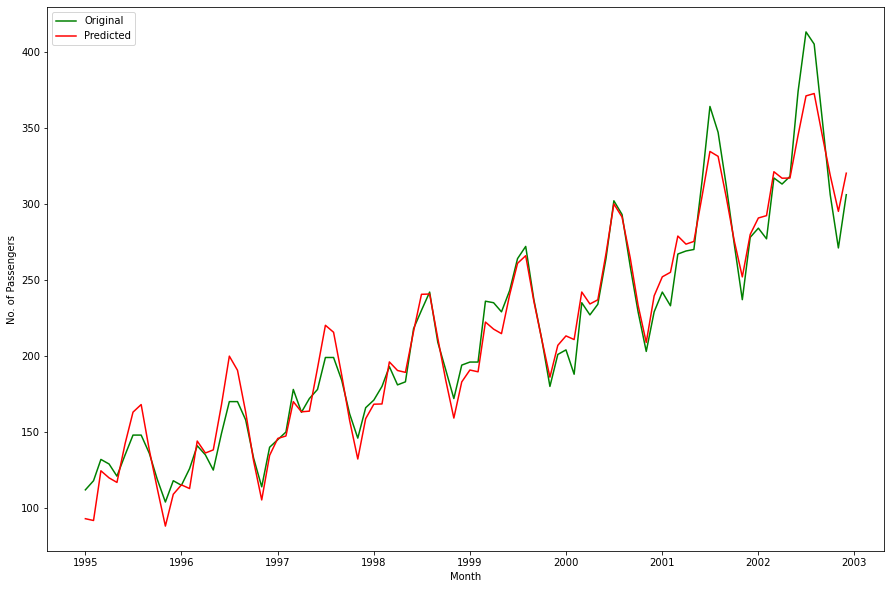

In [1433]:
plt.figure(figsize=(15,10))
plt.plot(df.ds, df.y, color='green', label='Original')
plt.plot(predicted.ds, predicted.yhat, color='Red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

In [1434]:
rsme1 = np.round(np.sqrt(mean_squared_error(df.y, predicted.yhat)), 2)
rsme1

12.74

In [1435]:
pred_future1= model1.predict(future_dates)
pred_future1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1995-01-01,109.263653,75.631851,108.614280,109.263653,109.263653,-16.216331,-16.216331,-16.216331,-16.216331,-16.216331,-16.216331,0.0,0.0,0.0,93.047322
1,1995-02-01,111.328641,75.579152,108.165963,111.328641,111.328641,-19.470476,-19.470476,-19.470476,-19.470476,-19.470476,-19.470476,0.0,0.0,0.0,91.858165
2,1995-03-01,113.193791,108.203020,141.018737,113.193791,113.193791,11.349623,11.349623,11.349623,11.349623,11.349623,11.349623,0.0,0.0,0.0,124.543414
3,1995-04-01,115.258779,103.566228,137.434653,115.258779,115.258779,4.621316,4.621316,4.621316,4.621316,4.621316,4.621316,0.0,0.0,0.0,119.880095
4,1995-05-01,117.257154,100.734975,133.553390,117.257154,117.257154,-0.362815,-0.362815,-0.362815,-0.362815,-0.362815,-0.362815,0.0,0.0,0.0,116.894339


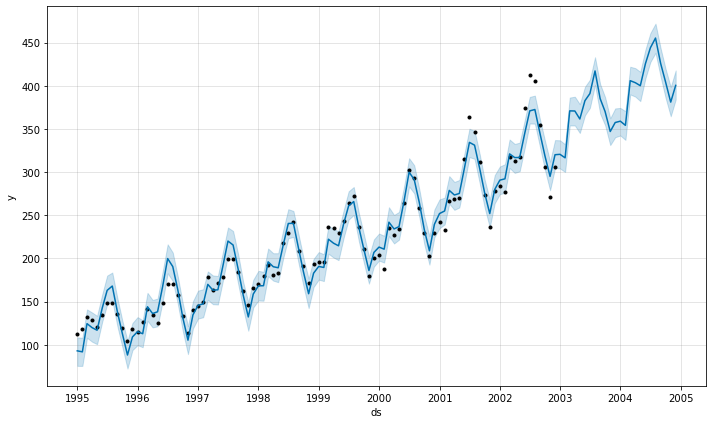

In [1436]:
model1.plot(pred_future1)
plt.show()

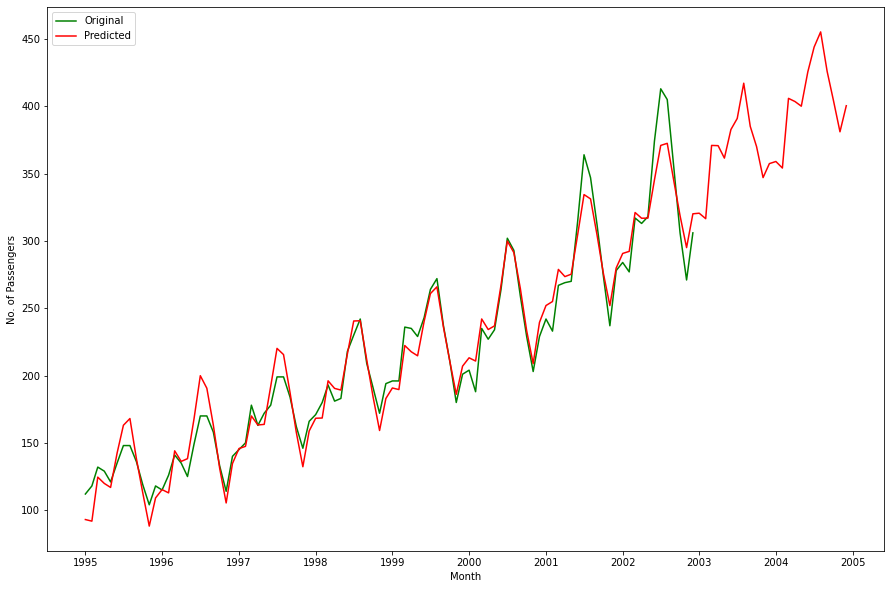

In [1437]:
plt.figure(figsize=(15,10))
plt.plot(df.ds, df.y, color='green', label='Original')
plt.plot(pred_future1.ds, pred_future1.yhat, color='Red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

# Lets Use stats_model library to do the time series analysis

In [1438]:
df1=pd.read_excel("D:\\pyt\\Assignment\\Assignment 18-Forecasting\\Airlines+Data.xlsx", date_parser="Month", index_col="Month")
df1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


<AxesSubplot:xlabel='Month'>

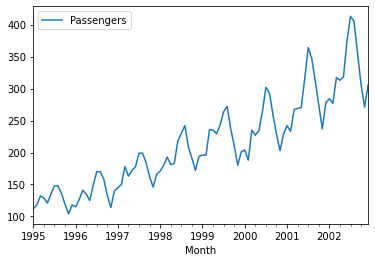

In [1439]:
df1.plot()

In [1440]:
from statsmodels.tsa.seasonal import seasonal_decompose

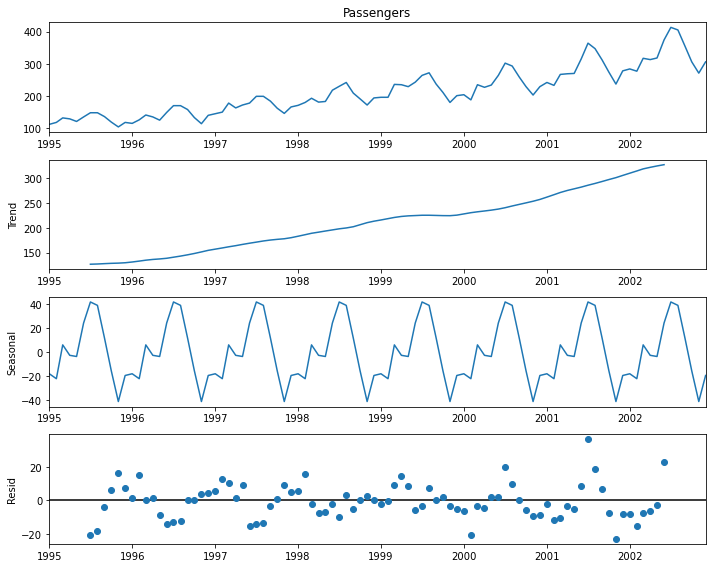

In [1441]:
plt.rcParams['figure.figsize'] = 10,8
decomposition =seasonal_decompose(df1.Passengers, model='additive', period= 12) # additive seasonal index
decomposition.plot()
plt.show()

In [1442]:
# Train test Split, with 6 years data as train and 2 years data as test
train_df = df1.iloc[0:72,:]
test_df = df1.iloc[72: ,:]
train_df.tail()

,Passengers
Month,
2000-08-01,293
2000-09-01,259
2000-10-01,229
2000-11-01,203
2000-12-01,229


# Holt Winters' method

In [1443]:
# using Holt Winters' method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [1444]:
# it is clear that seasonality is multiplicative as amplitude goes on increasing with time, 
# for trend lets try both "add"and "mul"
# lets try "add" first
model2 = ExponentialSmoothing(train_df, trend= "add" ,  seasonal= "mul" , 
                              seasonal_periods= 12, freq= "MS",
                              initialization_method="legacy-heuristic", use_boxcox=True).fit()

In [1445]:
forecast = model2.forecast(24)
forecast.head()

2001-01-01    233.185401
2001-02-01    238.058789
2001-03-01    277.968737
2001-04-01    265.590172
2001-05-01    262.741541
Freq: MS, dtype: float64

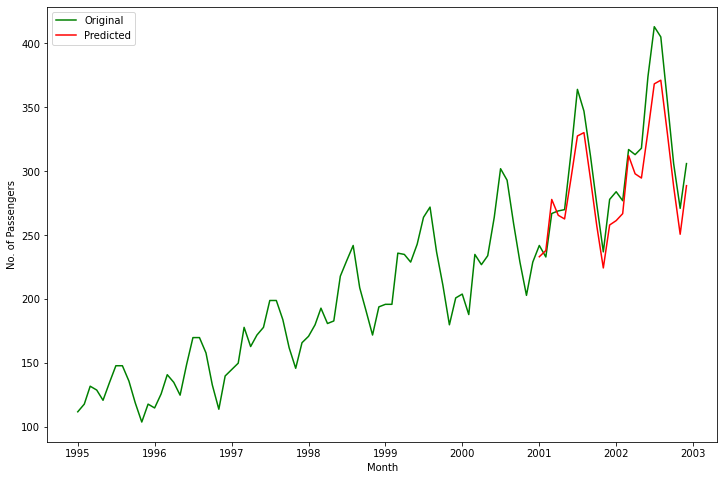

In [1446]:
plt.figure(figsize=(12,8))
plt.plot(df1.Passengers, color='green', label='Original')
plt.plot(forecast, color='Red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

In [1447]:
rsme2 = np.round(np.sqrt(mean_squared_error(test_df, forecast)), 2)
rsme2

21.88

In [1448]:
# it is clear that seasonality is multiplicative as amplitude goes on increasing with time, 
# for trend lets try both "add"and "mul"
# lets try "mul" 
model3 = ExponentialSmoothing(train_df, trend= "mul" ,  seasonal= "mul" , 
                              seasonal_periods= 12, freq= "MS", 
                              initialization_method="legacy-heuristic", use_boxcox=True).fit()


forecast1 = model3.forecast(24)
forecast1.head()

2001-01-01    233.513376
2001-02-01    238.645661
2001-03-01    278.976606
2001-04-01    266.820811
2001-05-01    264.230753
Freq: MS, dtype: float64

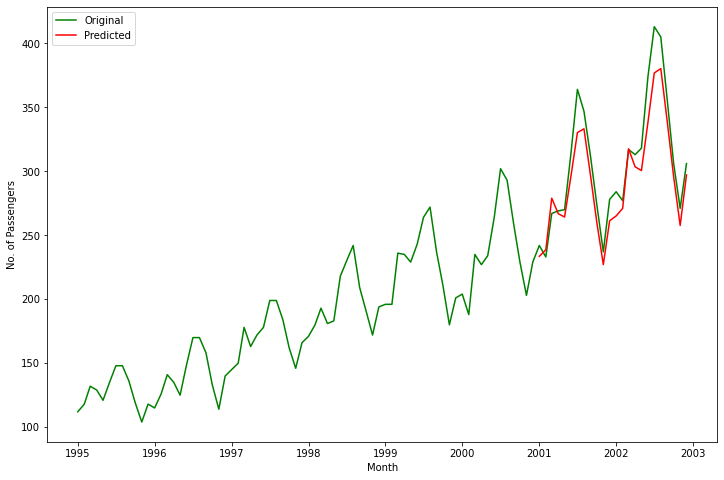

In [1449]:
plt.figure(figsize=(12,8))
plt.plot(df1.Passengers, color='green', label='Original')
plt.plot(forecast1, color='Red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

In [1450]:
rsme3 = np.round(np.sqrt(mean_squared_error(test_df, forecast1)), 2)
rsme3

17.52

In [1451]:
print(df1.Passengers.mean())
print(np.sqrt(df1.Passengers.var()))

213.70833333333334
71.91821622204908


In [1452]:
# making final model with trend= "mul" ,  seasonal= "mul" and traing on total data, and making forecasting for next 2 years

In [1453]:
model_f = ExponentialSmoothing(df1.Passengers, trend= "mul" ,  
                               seasonal= "mul" , seasonal_periods= 12, 
                               freq= "MS", initialization_method="legacy-heuristic", use_boxcox=True).fit()

forecast_f = model_f.forecast(24)
forecast_f.head()

2003-01-01    315.769753
2003-02-01    318.734176
2003-03-01    374.243729
2003-04-01    361.081225
2003-05-01    358.906318
Freq: MS, dtype: float64

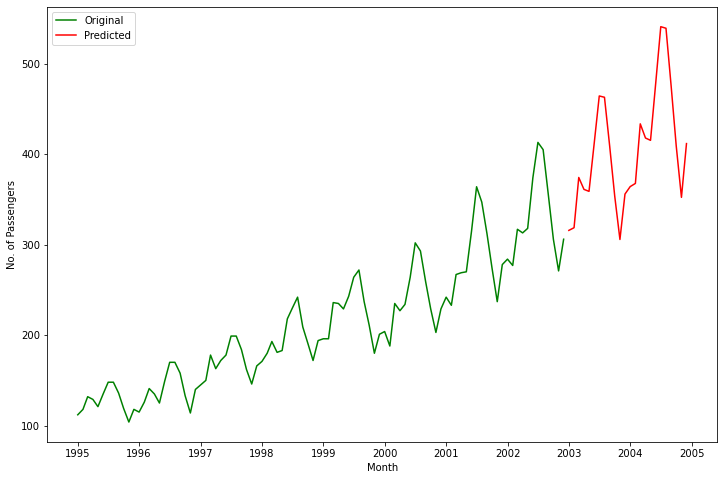

In [1454]:
plt.figure(figsize=(12,8))
plt.plot(df1.Passengers, color='green', label='Original')
plt.plot(forecast_f, color='Red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("No. of Passengers")
plt.legend()
plt.show()

# Lets Use seasonal ARIMA Model

In [1455]:
df2= df1.copy()
df2.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [1456]:
from statsmodels.tsa.stattools import adfuller

In [1457]:
# Lets check for stationarity using Dickey–Fuller test
def adfuller_test(data):
    print('Results of Dickey Fuller Test:')
    result = adfuller(data, autolag='AIC')
    label=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, label):
        print(f"{label} :- {value}")

In [1458]:
adfuller_test(df2)

Results of Dickey Fuller Test:
Test Statistic :- 1.3402479596467018
p-value :- 0.9968250481137263
#Lags Used :- 12
Number of Observations Used :- 83


In [1459]:
# Shifting data frame by 12 months
df2["Fist_diff"]= df2['Passengers']-df2['Passengers'].shift(12)

In [1460]:
adfuller_test(df2["Fist_diff"].dropna())

Results of Dickey Fuller Test:
Test Statistic :- -2.6900043838623167
p-value :- 0.07578397625851754
#Lags Used :- 1
Number of Observations Used :- 82


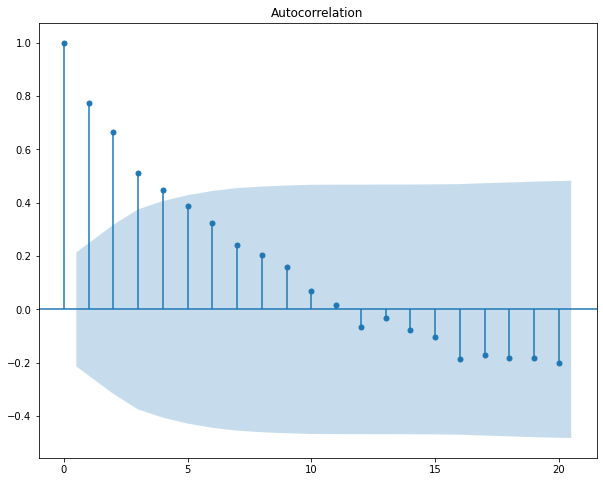

In [1461]:
#Autocorrelation function (ACF)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2.Fist_diff.dropna())
plt.show()

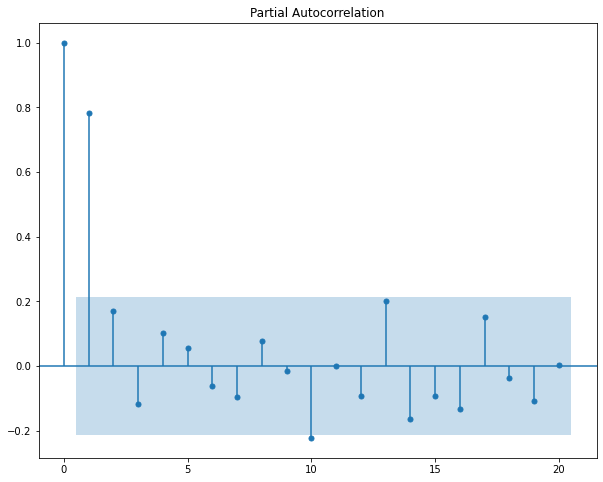

In [1462]:
# Partial autocorrelation function (PACF)
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df2.Fist_diff.dropna())
plt.show()

In [1463]:
# Train test Split, with 6 years data as train and 2 years data as test
train_df1 = df2.iloc[0:72,:]
test_df1 = df2.iloc[72: ,:]
test_df1.tail()

,Passengers,Fist_diff
Month,,
2002-08-01,405,58.0
2002-09-01,355,43.0
2002-10-01,306,32.0
2002-11-01,271,34.0
2002-12-01,306,28.0


In [1464]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model4 = SARIMAX(train_df1.Passengers, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), freq="MS") 
model_res = model4.fit()

C:\Users\STUDENT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [1465]:
df2["forecast"] = model_res.predict(start =72, end= 96 )

<AxesSubplot:xlabel='Month'>

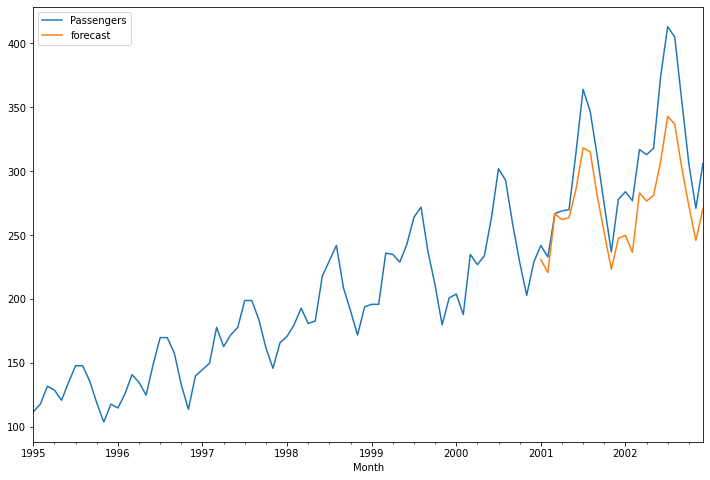

In [1466]:
df2[["Passengers", "forecast"]].plot(figsize=(12,8))

In [1467]:
y_hat = df2["forecast"].dropna()

In [1468]:
y_hat.shape

(24,)

In [1469]:
test_df1.shape

(24, 2)

In [1470]:
rsme4 = np.round(np.sqrt(mean_squared_error(test_df1.Passengers, y_hat)), 2)
rsme4

37.14

In [1471]:
from pandas.tseries.offsets import DateOffset

In [1472]:
future_dates= [df2.index[-1]+ DateOffset(months= x) for x in range (0,24)]
future_dates

[Timestamp('2002-12-01 00:00:00'),
 Timestamp('2003-01-01 00:00:00'),
 Timestamp('2003-02-01 00:00:00'),
 Timestamp('2003-03-01 00:00:00'),
 Timestamp('2003-04-01 00:00:00'),
 Timestamp('2003-05-01 00:00:00'),
 Timestamp('2003-06-01 00:00:00'),
 Timestamp('2003-07-01 00:00:00'),
 Timestamp('2003-08-01 00:00:00'),
 Timestamp('2003-09-01 00:00:00'),
 Timestamp('2003-10-01 00:00:00'),
 Timestamp('2003-11-01 00:00:00'),
 Timestamp('2003-12-01 00:00:00'),
 Timestamp('2004-01-01 00:00:00'),
 Timestamp('2004-02-01 00:00:00'),
 Timestamp('2004-03-01 00:00:00'),
 Timestamp('2004-04-01 00:00:00'),
 Timestamp('2004-05-01 00:00:00'),
 Timestamp('2004-06-01 00:00:00'),
 Timestamp('2004-07-01 00:00:00'),
 Timestamp('2004-08-01 00:00:00'),
 Timestamp('2004-09-01 00:00:00'),
 Timestamp('2004-10-01 00:00:00'),
 Timestamp('2004-11-01 00:00:00')]

In [1473]:
future_dates_df= pd.DataFrame(index=future_dates[1:], columns=df2.columns)
future_dates_df.head()

,Passengers,Fist_diff,forecast
2003-01-01,NaN,NaN,NaN
2003-02-01,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN


In [1474]:
future_df = pd.concat([df2, future_dates_df], axis=0)
future_df.tail()

,Passengers,Fist_diff,forecast
2004-07-01,NaN,NaN,NaN
2004-08-01,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN


In [1475]:
# Final model
model5 = SARIMAX(df2.Passengers, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), freq="MS") 
model_res1 = model5.fit()

C:\Users\STUDENT\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [1476]:
future_df["forecast"]=  model_res1.predict(start =97, end= 119 )
future_df.tail()

,Passengers,Fist_diff,forecast
2004-07-01,NaN,NaN,475.576810
2004-08-01,NaN,NaN,466.206711
2004-09-01,NaN,NaN,418.254808
2004-10-01,NaN,NaN,370.601293
2004-11-01,NaN,NaN,335.075237


<AxesSubplot:>

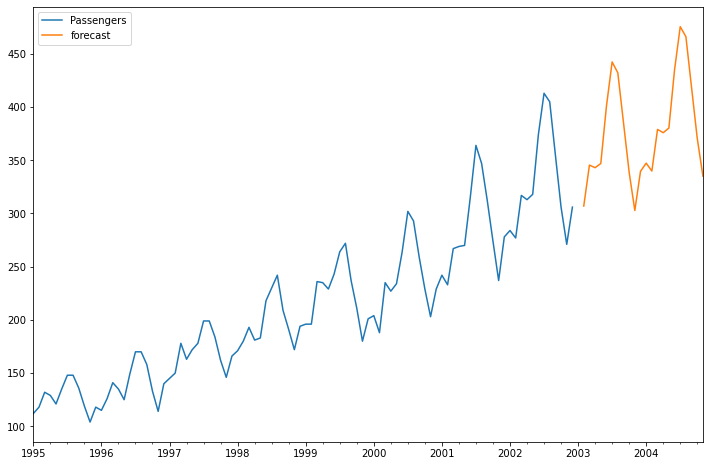

In [1477]:
future_df[["Passengers", "forecast"]].plot(figsize=(12,8))

In [1478]:
Comaparion = pd.DataFrame({"Method_used":["naive","fbprophet","Holt Winters_add", "Holt Winters_mul", "Seasonal_ARIMA" ],
                           "RSME":[rsme0, rsme,rsme2, rsme3, rsme4]})

In [1479]:
Comaparion

,Method_used,RSME
0,naive,23.333283
1,fbprophet,38.040000
2,Holt Winters_add,21.880000
3,Holt Winters_mul,17.520000
4,Seasonal_ARIMA,37.140000


# From above table we can see that, Holt-Winters method with Multiplicative trend, gives the best results, hence, this model cab be selected based on RSME value